In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#paths to the train, validation and test image datasets
train_path = '/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification/Garbage classification'
valid_path = '/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification/Garbage classification'
test_path='/content/drive/MyDrive/projects/Garbage_scanning/5class_gaarbage_classifier/mobilenet/data/Garbage classification/Garbage classification'

In [3]:
# extract images to training set by applying data preprocessing and data augmentation
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal',
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')


# extract images to validation set
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    validation_split=0.2).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal',
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')
# extract images to test set
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    validation_split=0.05).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal',
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')

Found 2276 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Found 124 images belonging to 6 classes.


In [4]:
IMG_SHAPE = (224, 224, 3)

In [5]:
base_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE,
                                        include_top=False,
                                        weights='imagenet')
model = Sequential()

# Freeze the convolutional base of VGG16 to prevent the pre-trained weights being updated
# during training inorder to extract features
base_model.trainable=False

# add VGG16 convolution base to initialize sequential model
model.add(base_model)

# add global average pooling layer
model.add(GlobalAveragePooling2D())

# add densely-connected NN layer with 512 hidden units
model.add(Dense(units=512, activation='relu'))  # use ReLU activation function
model.add(BatchNormalization())                 # normalize and scale inputs or activations
model.add(Dropout(0.2))                         # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 128 hidden units
model.add(Dense(units=128, activation='relu')) # use ReLU activation function
model.add(BatchNormalization())                # normalize and scale inputs or activations
model.add(Dropout(0.2))                        # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 6 hidden units
model.add(Dense(units=6, activation='softmax')) # use Softmax activation function to do final predictions
model.summary()

80134624/80134624 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                         

In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

Epoch 1/20
143/143 - 509s - loss: 1.6797 - accuracy: 0.3994 - val_loss: 1.0023 - val_accuracy: 0.6541 - 509s/epoch - 4s/step
Epoch 2/20
143/143 - 42s - loss: 1.0156 - accuracy: 0.6362 - val_loss: 0.7453 - val_accuracy: 0.7316 - 42s/epoch - 291ms/step
Epoch 3/20
143/143 - 41s - loss: 0.8439 - accuracy: 0.7021 - val_loss: 0.6192 - val_accuracy: 0.7793 - 41s/epoch - 287ms/step
Epoch 4/20
143/143 - 42s - loss: 0.7401 - accuracy: 0.7320 - val_loss: 0.5401 - val_accuracy: 0.8032 - 42s/epoch - 296ms/step
Epoch 5/20
143/143 - 42s - loss: 0.6665 - accuracy: 0.7588 - val_loss: 0.4913 - val_accuracy: 0.8290 - 42s/epoch - 291ms/step
Epoch 6/20
143/143 - 42s - loss: 0.6332 - accuracy: 0.7737 - val_loss: 0.4370 - val_accuracy: 0.8549 - 42s/epoch - 290ms/step
Epoch 7/20
143/143 - 45s - loss: 0.5564 - accuracy: 0.7996 - val_loss: 0.4090 - val_accuracy: 0.8628 - 45s/epoch - 314ms/step
Epoch 8/20
143/143 - 42s - loss: 0.5259 - accuracy: 0.8124 - val_loss: 0.3626 - val_accuracy: 0.8787 - 42s/epoch - 292m

In [8]:
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [11]:
print(accuracy)
print(validation_accuracy)

[0.39938488602638245, 0.6362038850784302, 0.7021089792251587, 0.7319859266281128, 0.7587873339653015, 0.7737258076667786, 0.7996485233306885, 0.812390148639679, 0.8242530822753906, 0.8264499306678772, 0.8497363924980164, 0.8444639444351196, 0.8712653517723083, 0.8664323091506958, 0.8765377998352051, 0.8703866600990295, 0.8809314370155334, 0.8800527453422546, 0.8875219821929932, 0.8963093161582947]
[0.654075562953949, 0.7316103577613831, 0.7793240547180176, 0.8031809329986572, 0.8290258646011353, 0.8548707962036133, 0.8628230690956116, 0.8787276148796082, 0.8886680006980896, 0.8966202735900879, 0.9005964398384094, 0.9125248789787292, 0.9125248789787292, 0.9125248789787292, 0.9085487127304077, 0.9125248789787292, 0.9244532585144043, 0.9244532585144043, 0.9304174780845642, 0.9363816976547241]


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
predictions = model.predict(test_batches)

# Get the predicted labels by taking the index of the maximum probability
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test set
true_labels = test_batches.classes

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, normalize='true')  # normalize the confusion matrix

# Print the confusion matrix
print("Confusion Matrix (Normalized):")
print(conf_matrix)


8/8 [==============================] - 1s 132ms/step
Confusion Matrix (Normalized):
[[0.35       0.05       0.1        0.35       0.1        0.05      ]
 [0.24       0.36       0.         0.16       0.24       0.        ]
 [0.15       0.2        0.2        0.1        0.3        0.05      ]
 [0.06896552 0.20689655 0.31034483 0.27586207 0.10344828 0.03448276]
 [0.08333333 0.20833333 0.25       0.16666667 0.16666667 0.125     ]
 [0.         0.33333333 0.         0.5        0.16666667 0.        ]]


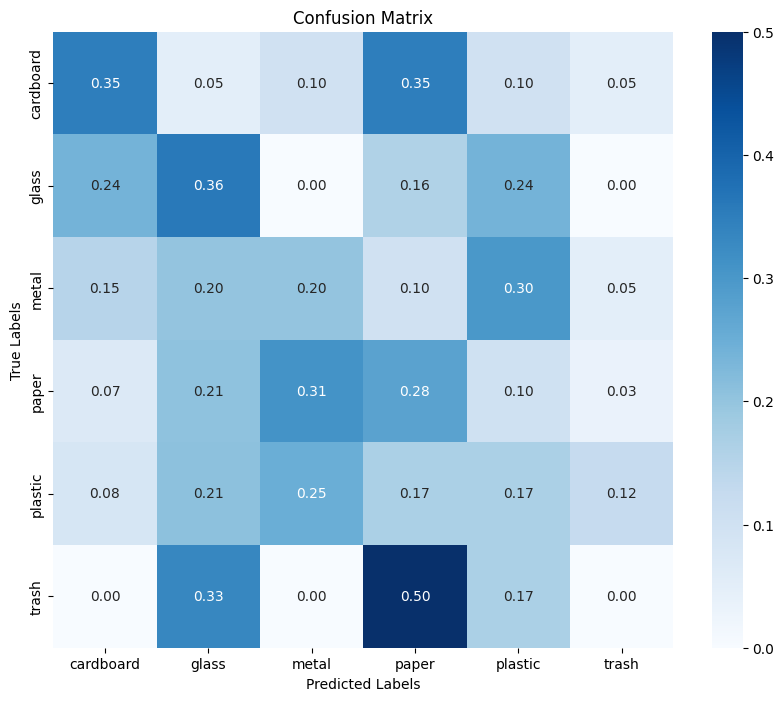

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.2f', xticklabels=test_batches.class_indices.keys(), yticklabels=test_batches.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [18]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.35      0.35        20
           1       0.33      0.36      0.35        25
           2       0.19      0.20      0.20        20
           3       0.29      0.28      0.28        29
           4       0.18      0.17      0.17        24
           5       0.00      0.00      0.00         6

    accuracy                           0.26       124
   macro avg       0.22      0.23      0.22       124
weighted avg       0.26      0.26      0.26       124

